In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['font.size'] =  18.0

# Let's start with the spring equation

# $$ m \ddot{x} + \nu \dot{x} + \kappa x = 0 $$

# for $x = x(t)$ and $m$, $\nu$, $\kappa >0$.

# Question: What does each term in the equation mean physically?

# Answer:

# $\dot{x}$ is the velocity of the mass [1 point]
# $\ddot{x}$ is the acceleration of the mass [1 point]
# $m\dot{x}$ represents one side of Newton's equatiion F=ma [1 point]
# $\nu\dot{x}$ is a friction force [1 point]
# $\kappa x $ is a restoring force, known as Hooke's law [1 point]


# Question: How can we convert this to a system of first order ODEs?

# Answer: 

# First, we can introduce a dummy variable

# $$ y = \dot{x} $$ 

# This equation is our first equation in the next system. [1 point]

# The equation also implies that $\dot{y} = \ddot{x}$. [1 point]

# Therefore, the second equation in our system is the original ODE rewritten in terms of $x$, $y$, and $\dot{y}$ is, 


# $$ m \dot{y} + \nu y + \kappa x = 0 $$ [1 point]

# The system is written in the more typical form as, 

# $$ \dot{x} = y $$
# $$ \dot{y} = -\frac{\nu}{m} y - \frac{\kappa}{m} x $$ [1 point]

# Question: What information is missing to complete our ability to solve the ODE system (whether by simulation or analytically)?

# Answer: 

# We need initial conditions for position and velocity. [1 point] 

# This can come in the form of $x(t=0)$ and $\dot{x}(t=0) = y(t=0)$. [1 point]

# Question: Can you explain the following code meant to simulate the ODE system?

In [2]:
# Answer: right hand side of x differential equation [1 point]

def f(y): 
    return y

# Answer: right hand side of y differential equation [1 point]

def g(x, y, m, nu, k):
    return -(nu/m)*y - (k/m)*x

# The following is the 2nd Order Runge-Kutta method, can you explain that method?

'''
Answer: 
It is a predictor-corrector method. 
We make an initial guess of the next values for the system first, essentially using the Euler method. [1 point]
We use those guesses to again evaluate the next step in a similar way to the Euler method. [1 point]
'''
def RK2_step(x,y, m, nu, k, dt):
    
    x_half_step = x + 0.5*dt*f(y)
    y_half_step = y + 0.5*dt*g(x, y, m, nu, k)
    
    x_new = x + dt*f(y_half_step)
    y_new = y + dt*g(x_half_step, y_half_step, m, nu, k)
    
    return x_new, y_new

def RK2(x0, y0, m, nu, k0, dt,T):
    
    # Initial data storage
    x_data = [x0]
    y_data = [y0]
    t_data = [0]
    
    # Answer: Loop over the single 2nd order Runge-Kutta step until we hit the final time. [1 point]
    while t_data[-1] < T:
        
        # RK2 Step
        x_new, y_new = RK2_step(x_data[-1],y_data[-1], m, nu, k0, dt)
        
        # Storage new data
        x_data.append(x_new)
        y_data.append(y_new)
        t_data.append(t_data[-1]+dt)
        
    return x_data, y_data, t_data

Text(0.5, 0, 'Time [s]')

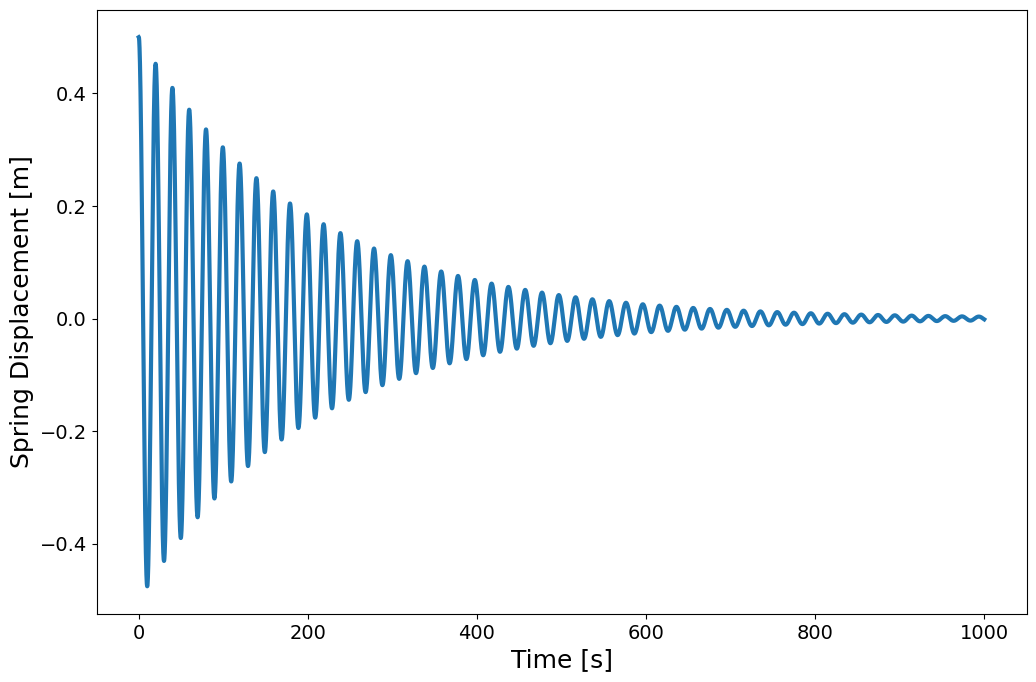

In [3]:
x_data, y_data, t_data = RK2(0.5, 0, 1, .01, .1, 0.01,1000)

plt.plot(t_data, x_data)

plt.ylabel('Spring Displacement [m]')
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

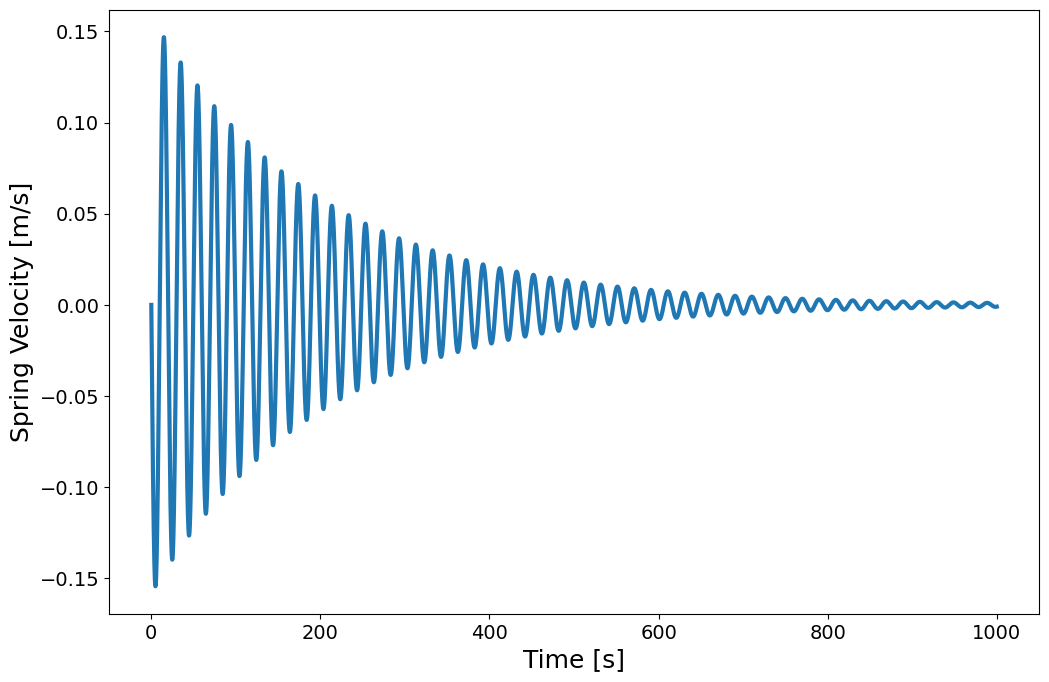

In [4]:
plt.plot(t_data, y_data)

plt.ylabel('Spring Velocity [m/s]')
plt.xlabel('Time [s]')

In [5]:
def nonlinear_force(y,nu0, nu1):
    return nu0*y + nu1*y**3

Text(0.5, 0, 'Spring Velocity [m/s]')

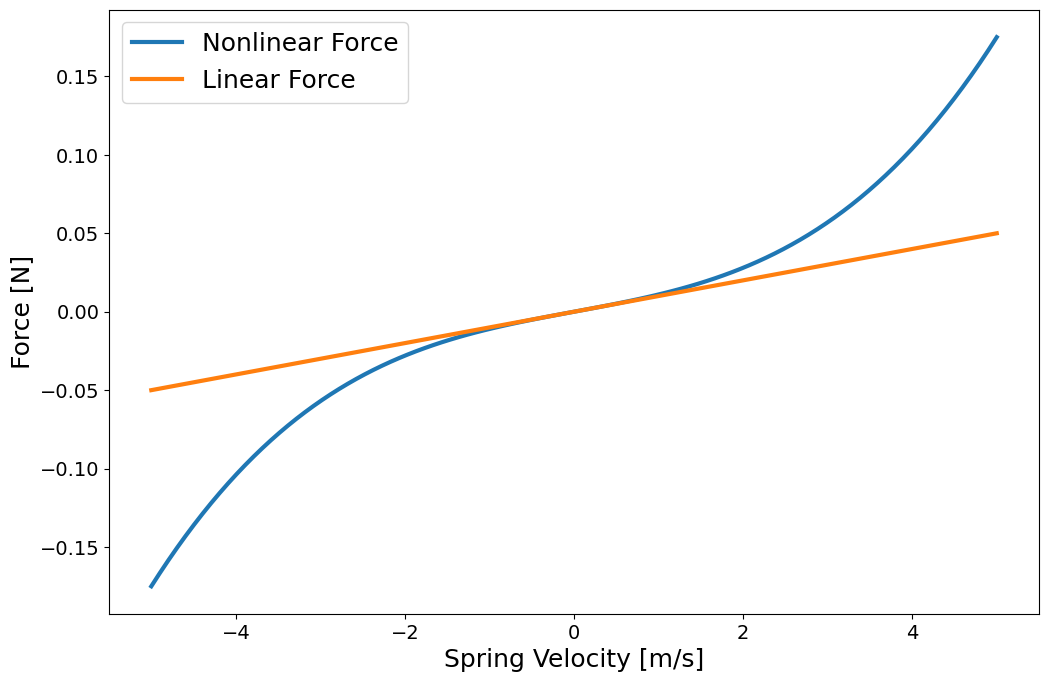

In [6]:
y = np.linspace(-5,5,100)
nu0 = 0.01
nu1 = 0.001

plt.plot(y,nonlinear_force(y,nu0,nu1))

plt.plot(y,nonlinear_force(y,nu0,0))

plt.legend(['Nonlinear Force',
           'Linear Force'])

plt.ylabel('Force [N]')
plt.xlabel('Spring Velocity [m/s]')

Text(0.5, 0, 'Time [s]')

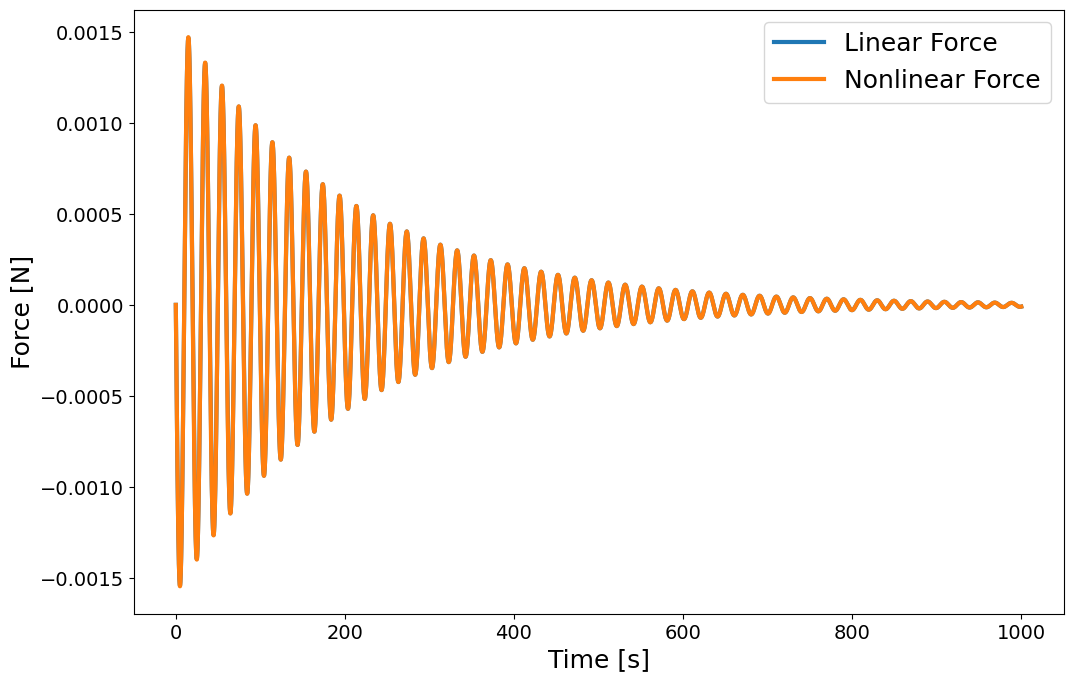

In [7]:
nu0 = 0.01
nu1 = 0.001

nonlinear_force_data = []
linear_force_data = []

for y in y_data:
    nonlinear_force_data.append(nonlinear_force(y,nu0,nu1))
    linear_force_data.append(nonlinear_force(y,nu0,0))

    
plt.plot(t_data,linear_force_data)

plt.plot(t_data,nonlinear_force_data)

plt.legend(['Linear Force',
           'Nonlinear Force'])

plt.ylabel('Force [N]')
plt.xlabel('Time [s]')

In [8]:
def f(y): 
    return y

def g(x, y, m, nu0, nu1, k0):
    return -(nonlinear_force(y,nu0,nu1)/m) - (k0/m)*x

def RK2_step(x,y, m, nu0,nu1, k0, dt):
    
    # Euler half step
    x_half_step = x + 0.5*dt*f(y)
    y_half_step = y + 0.5*dt*g(x, y, m, nu0, nu1, k0)
    
    # Runge-Kutta step
    x_new = x + dt*f(y_half_step)
    y_new = y + dt*g(x_half_step, y_half_step, m, nu0, nu1, k0)
    
    return x_new, y_new

def RK2(x0, y0, m, nu0, nu1, k0, dt,T):
    
    # Initial data storage
    x_data = [x0]
    y_data = [y0]
    t_data = [0]
    
    while t_data[-1] < T:
        
        # RK2 Step
        x_new, y_new = RK2_step(x_data[-1],y_data[-1], m, nu0, nu1, k0,dt)
        
        # Storage new data
        x_data.append(x_new)
        y_data.append(y_new)
        t_data.append(t_data[-1]+dt)
        
    return x_data, y_data, t_data

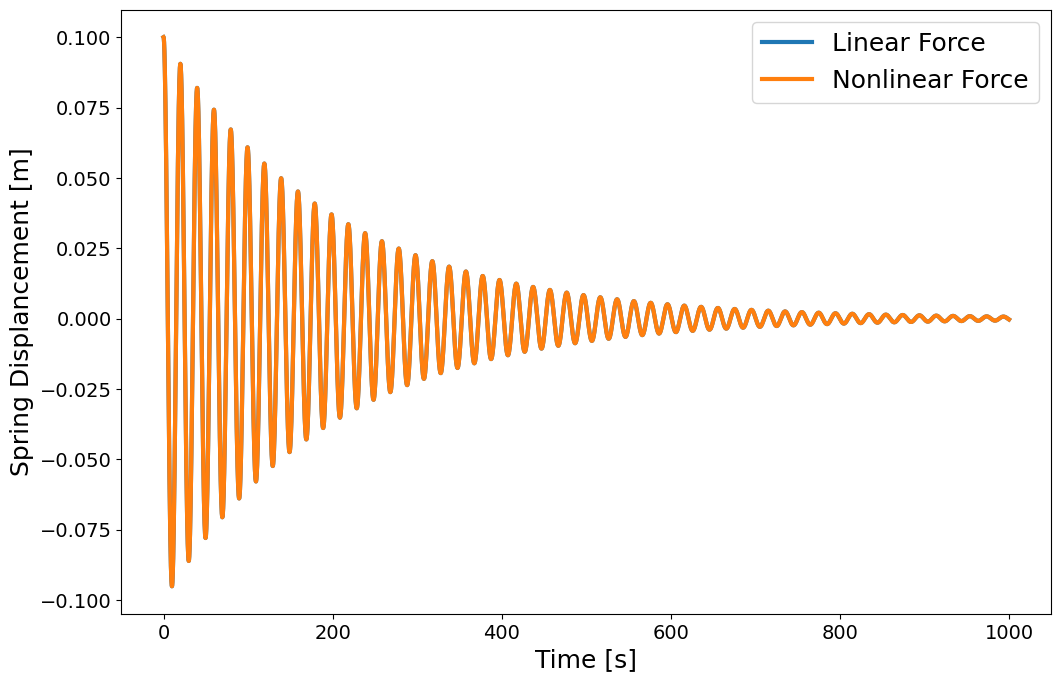

In [9]:
nu0 = 0.01
nu1 = 0.001
x0 = 0.1
y0 = 0
m=1
k0 = 0.1


x_data, y_data, t_data = RK2(x0, y0, m, nu0, 0,k0,0.1,1000)

plt.plot(t_data, x_data)

x_data, y_data, t_data = RK2(x0, y0, m, nu0, nu1,k0,0.1,1000)

plt.plot(t_data, x_data)



plt.ylabel('Spring Displancement [m]')
plt.xlabel('Time [s]')

plt.legend(['Linear Force',
           'Nonlinear Force'])

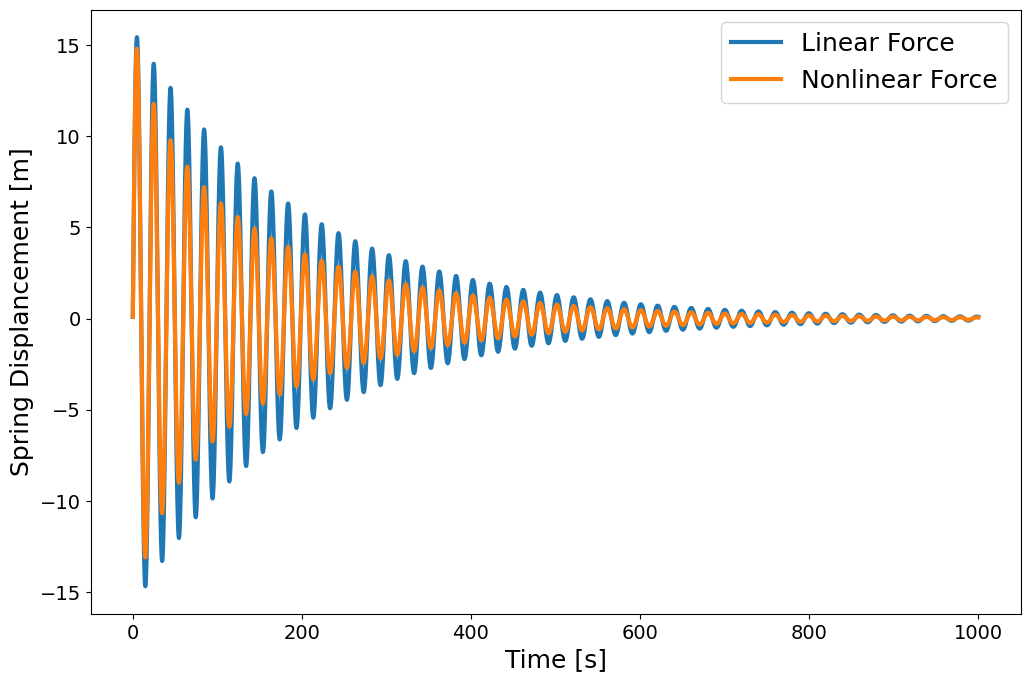

In [10]:
nu0 = 0.01
nu1 = 0.001
x0 = 0.1
y0 = 5
m=1
k0 = 0.1

x_data_linear, y_data_linear, t_data_linear = RK2(x0, y0, m, nu0, 0,k0,0.1,1000)

plt.plot(t_data_linear, x_data_linear)

x_data_nonlinear, y_data_nonlinear, t_data_nonlinear = RK2(x0, y0, m, nu0, nu1,k0,0.1,1000)

plt.plot(t_data_nonlinear, x_data_nonlinear)

plt.ylabel('Spring Displancement [m]')
plt.xlabel('Time [s]')

plt.legend(['Linear Force',
           'Nonlinear Force'])

# Question: What is a norm or metric?

# A: Technically, a norm is a function with a range between zero and positive infinity. Further, it is required to satisfy the triangle inequality for 3 different inputs. More generally, the metric is just a function we use to assign a value to the error associated between two data sets. 

In [14]:
def metric(x_target,x_predicted):
    norm_val = 0
    for i in range(0,len(x_target)):
        norm_val += (x_target[i] - x_predicted[i])**2
        
    norm_val /= len(x_target)
    
    return norm_val

Text(0.5, 0, 'Spring Displacement [m]')

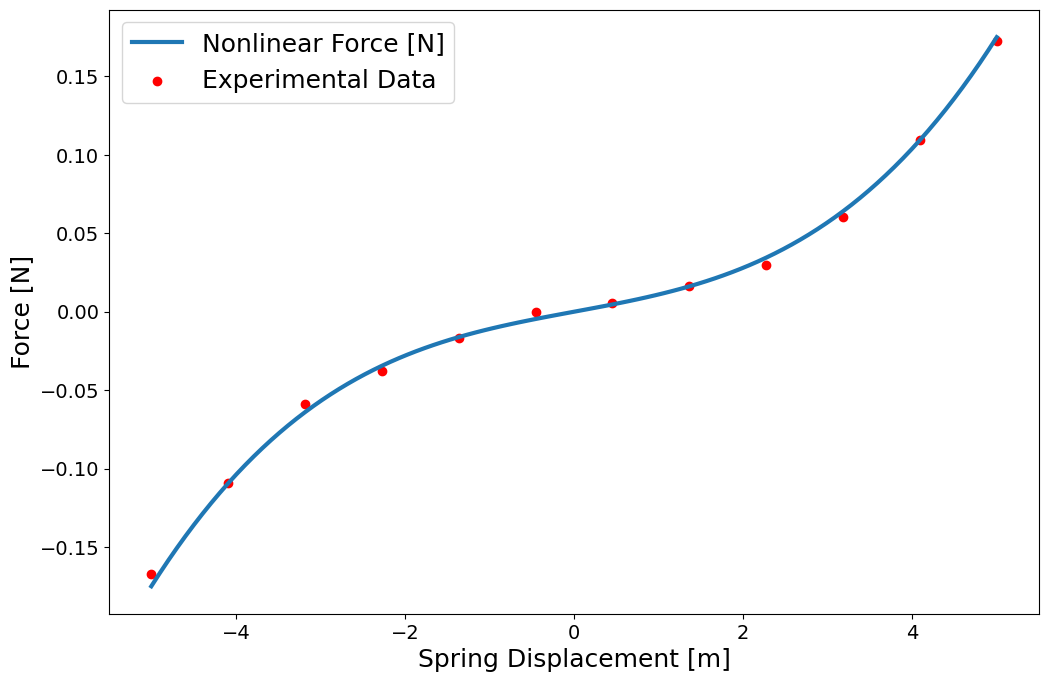

In [15]:
# fit one parameter

y = np.linspace(-5,5,100)
nu0 = 0.01
nu1 = 0.001


plt.plot(y,nonlinear_force(y,nu0,nu1))

data = nonlinear_force(y,nu0,nu1) + np.random.normal(0,0.005,len(y))

data = y[::9], data[::9]

plt.scatter(data[0],data[1], color = 'red')


plt.legend(['Nonlinear Force [N]',
           'Experimental Data'])

plt.ylabel('Force [N]')
plt.xlabel('Spring Displacement [m]')

# Question: Suppose we had the data and knew that the form of the data was 
# $$ f(\dot{x}) = \nu_0\dot{x} + \nu_1\dot{x}^2 + \varepsilon$$
# where $\varepsilon$ is unbiased normally distributed random noise but did not know the values of the parameters $\nu_0$ and $\nu_1$. How might you fit the function 

# $$ f(\dot{x}) = \nu_0\dot{x} + \nu_1\dot{x}^2 + $$

# to the data?

# A: There are several ways to do this. Ultimately, each method requires a measure of error between the data and the model. We want to minimise this measure. This can be done directly with polynomials but taking derivatives of the metric with respect to the parameters and solving for the zero valued derivatives. Alternatively, and more pertinent to the project, we can apply the gradient descent algorithm to this problem. 

# Question: What do you expect to happen to the metric between the simulations using the linear and nonlinear force as the initial condition for velocity increases?

# Answer: 

# The metric should increase. [1 point]
# This is because the increase in initial velocity will make the difference in the forces more pronounced. [1 point]
# The difference in forces will create different dynamics for the spring displacement. [1 point]

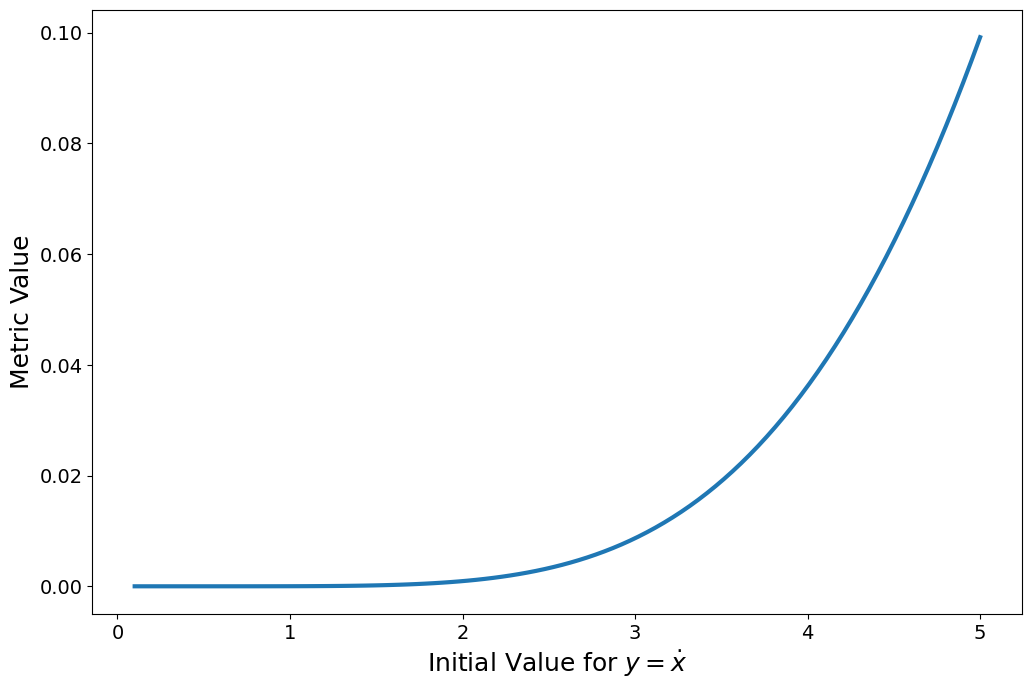

In [16]:
metric_data = []
for initial_y in np.linspace(0,5,100):
    # nonlinear force simulation 
    x_data_nonlinear, y_data_nonlinear, t_data_nonlinear = RK2(x0, initial_y, m, nu0, nu1,k0,0.1,1000)
    
    # linear force simulation 
    x_data_linear, y_data_linear, t_data_linear = RK2(x0, initial_y, m, nu0, 0,k0,0.1,1000)
    
    metric_data.append(metric(y_data_nonlinear, y_data_linear))
    
plt.plot(np.linspace(0.1,5,100), metric_data)
plt.xlabel('Initial Value for $y = \dot{x}$')
plt.ylabel('Metric Value');

In [17]:
# target data
nu0 = 0.01
nu1_true = 0.001
x0 = 0.1
y0 = 5
m=1
k0 = 0.1
dt = 0.1
T = 1000

x_data, y_data, t_data = RK2(x0, y0, m, nu0, nu1_true,k0,dt,T)

Text(0.5, 0, 'Time [s]')

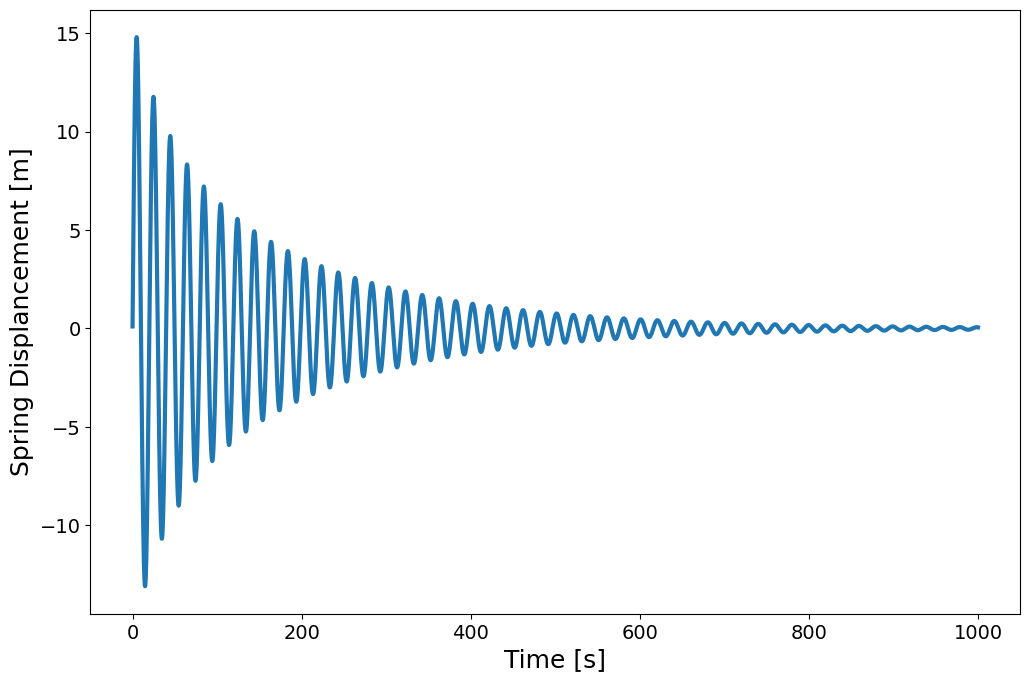

In [19]:
plt.plot(t_data, x_data)
plt.ylabel('Spring Displancement [m]')
plt.xlabel('Time [s]')


# Question: Can you sketch out the Gradient Descent Algorithm given a norm which requires one unknown parameter value?

# Suppose we have the norm

# $$\mathcal{L}(p) = \frac{1}{N}\sum_{i=0}^N (x(i;p) - \hat{x}(i))^2 $$

# Where $x(i;p)$ is a collection of data points which continuously depend on the parameter $p$ and  $\hat{x}((i)$ are the target data points we want to represent with $x(i;p)$

# Answer: 

# The general gradient descent algorithm is 

# $$ p^{j+1} = p^j - \lambda \frac{d\mathcal{L}}{dp}(p^j) $$ [1 point]

# where $\lambda$ is the step size of the algorithm, controlling how large the changes in guesses are.  [1 point]

# We can evaluate the derivative numerically as, for example, 

# $$ \frac{d\mathcal{L}}{dp}(p^j) \approx \frac{\mathcal{L}(p^j + \delta) - \mathcal{L}(p^j + \delta)}{2\delta} $$ [1 point]

# The algorithm requires an initial guess $p^0$ to begin. [1 point]

# The iteration scheme above updates the values by calculating the gradient and evaluating the right hand side. The result is the next guess. [1 point]

# The algorithm stops when we reach some stopping condition, usually that the derivative value is within some distance to zero, i.e.

# $$\big| \frac{d\mathcal{L}}{dp}(p^j) \big| < \gamma $$ [1 point]

# This stopping condition corresponds to a local minimum, local maximum, or inflection point. [1 point]

# But the algorithm should avoid the latter two types of points because it moves away from maximums and has discrete steps, so it is likely to "jump over" inflection points. [1 point]

In [23]:
def numerical_derivative(nu1):
    
    ### gradient calculation ### 
    delta = 0.000001
    
    # plus side of derivative
    simulation_plus = RK2(x0, y0, m, nu0, nu1+delta,k0,dt,T)
    norm_plus = metric(y_data, simulation_plus[1])
    
    # minus side of derivative 
    simulation_minus = RK2(x0, y0, m, nu0, nu1-delta,k0,dt,T)
    norm_minus = metric(y_data, simulation_minus[1])
    
    # gradient
    numerical_derivative = (norm_plus - norm_minus) / delta
    
    return numerical_derivative

def GD_step(nu1,lamb):
    
    nu1 = nu1 - lamb*numerical_derivative(nu1)
    
    return nu1

def GD_method(nu1):
    
    lamb = .00001
    
    # store initial guess
    nu1_data = [nu1]
    
    # generate initial norm value
    simulation = RK2(x0, y0, m, nu0, nu1_data[-1],k0,dt,T)
    norm = metric(y_data, simulation[1])
    
    # store initial norm value 
    norm_data = [norm]
    
    # generate derivative data
    num_deriv = numerical_derivative(nu1_data[-1])
    
    # store derivative data
    num_deriv_data = [num_deriv]
    
    
    while abs(num_deriv_data[-1]) > 1e-6:
        nu1_new = GD_step(nu1_data[-1],lamb)
        nu1_data.append(nu1_new)
        
        num_deriv = numerical_derivative(nu1_data[-1])
        num_deriv_data.append(num_deriv)
        
        simulation = RK2(x0, y0, m, nu0, nu1_data[-1],k0,dt,T)
        norm = metric(y_data, simulation[1])
        norm_data.append(norm)
        
    return nu1_data, norm_data, num_deriv_data

In [24]:
nu1_data, norm_data, num_deriv_data = GD_method(0.02)

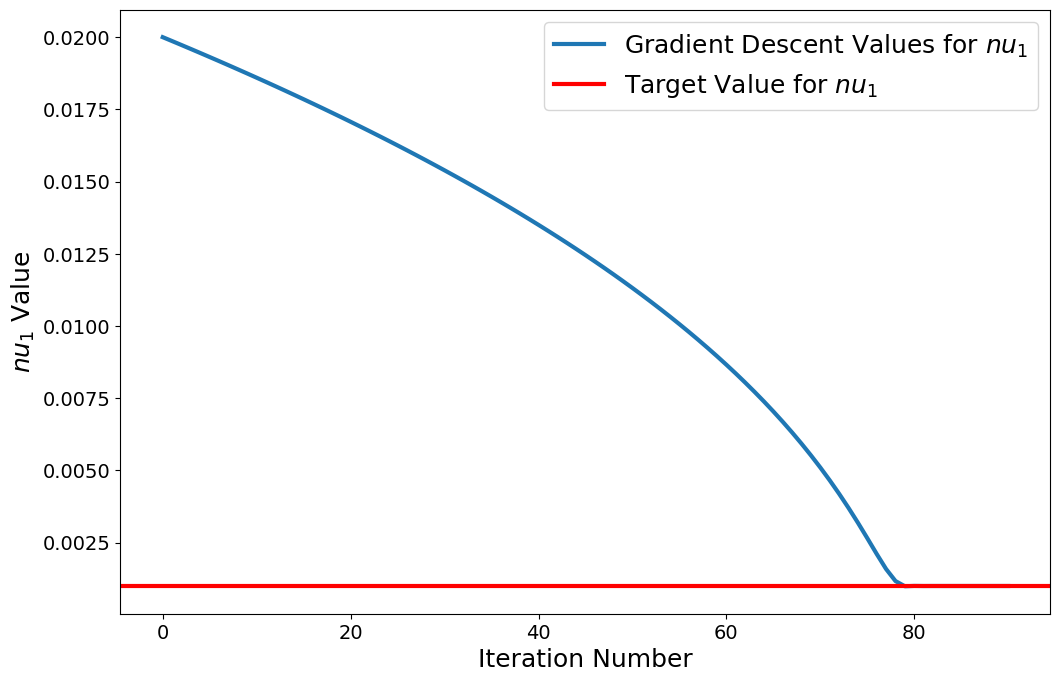

In [34]:
plt.plot(nu1_data)
plt.axhline(nu1_true, color = 'red')

plt.legend(['Gradient Descent Values for $nu_1$',
           'Target Value for $nu_1$'])
plt.xlabel('Iteration Number')
plt.ylabel('$nu_1$ Value');

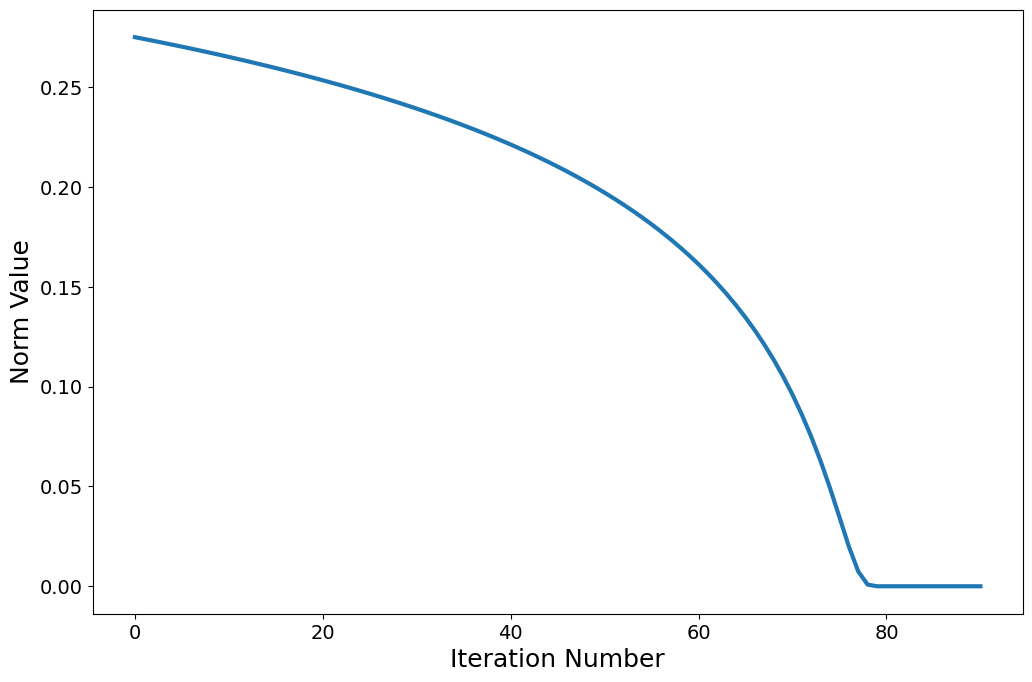

In [35]:
plt.plot(norm_data)
plt.xlabel('Iteration Number')
plt.ylabel('Norm Value');

Text(0, 0.5, 'Numerical Derivative Value')

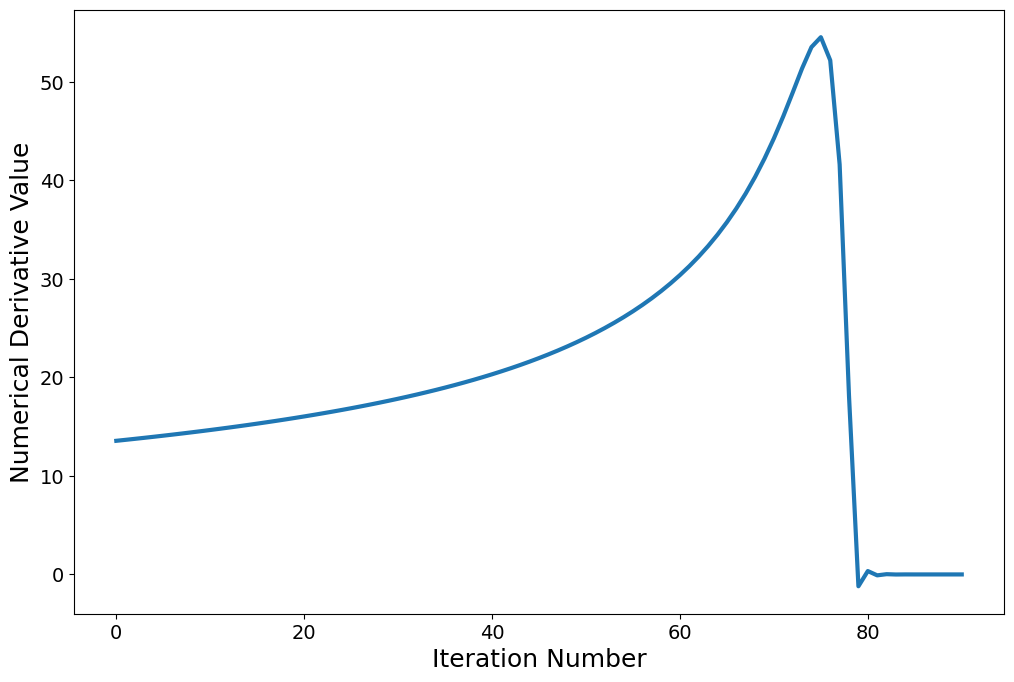

In [36]:
plt.plot(num_deriv_data)
plt.xlabel('Iteration Number')
plt.ylabel('Numerical Derivative Value')

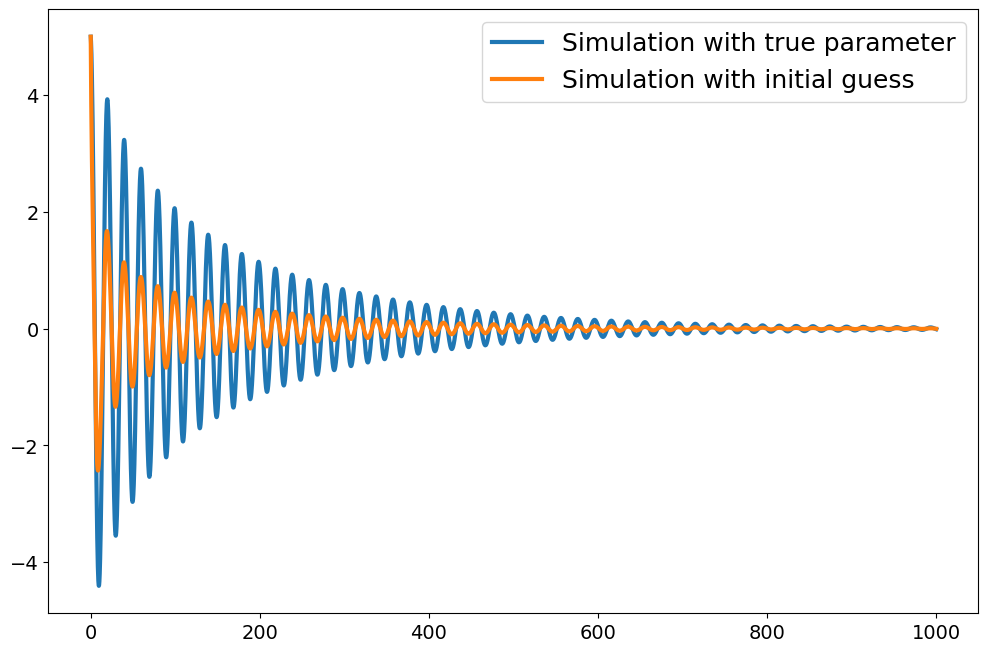

In [37]:
plt.plot(t_data, y_data)

# simulation with initial guess of parameter
simulation0 = RK2(x0, y0, m, nu0, nu1_data[0],k0,dt,T)
plt.plot(simulation0[-1], simulation0[1])

plt.legend(['Simulation with true parameter',
           'Simulation with initial guess'])

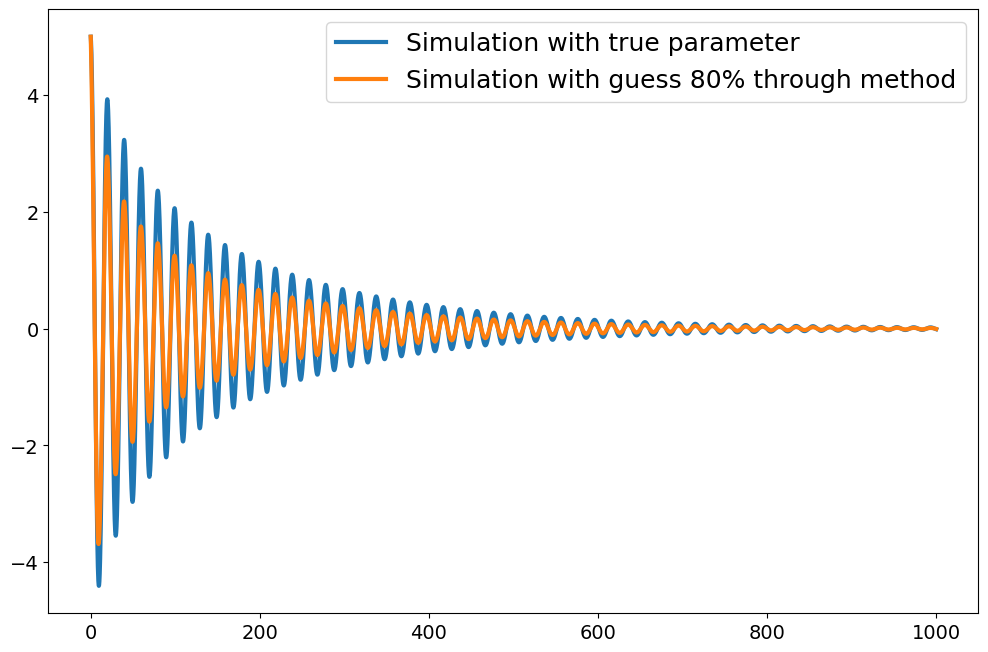

In [38]:
plt.plot(t_data, y_data)

# simulation with initial guess of parameter
index = int(len(nu1_data)*.8)
simulation0 = RK2(x0, y0, m, nu0, nu1_data[index],k0,dt,T)
plt.plot(simulation0[-1], simulation0[1])

plt.legend(['Simulation with true parameter',
           'Simulation with guess 80% through method'])

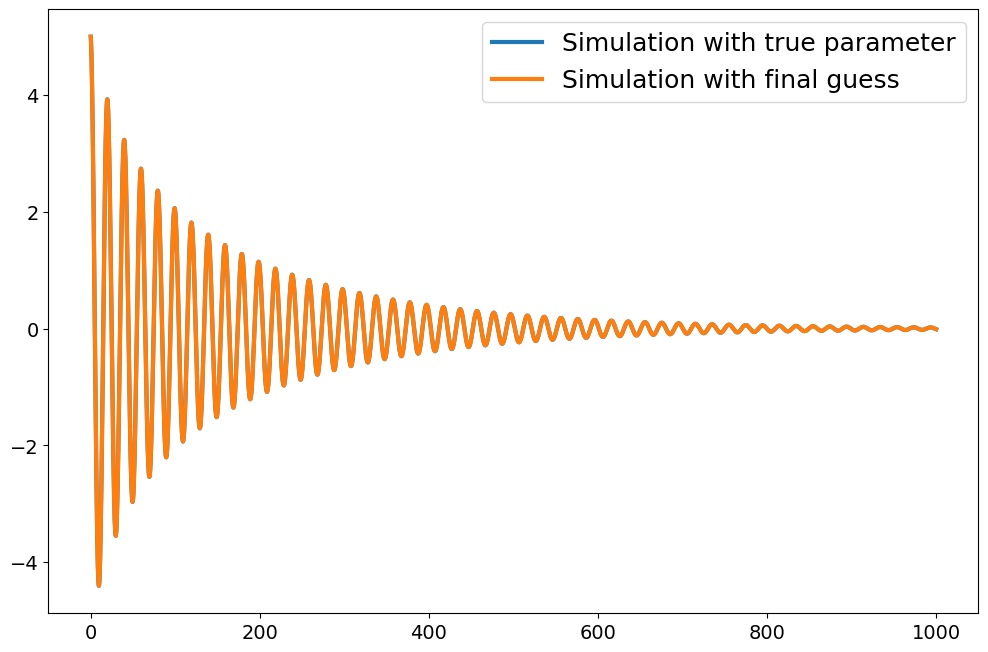

In [39]:
plt.plot(t_data, y_data)

# simulation with initial guess of parameter
simulation0 = RK2(x0, y0, m, nu0, nu1_data[-1],k0,dt,T)
plt.plot(simulation0[-1], simulation0[1])

plt.legend(['Simulation with true parameter',
           'Simulation with final guess'])

# Question: Can you sketch out the Gradient Descent Algorithm given a norm which requires more than one unknown parameter value?

# Suppose we have the norm

# $$\mathcal{L}(\vec{p}) = \frac{1}{N}\sum_{i=0}^N (x(i;\vec{p}) - \hat{x}((i))^2 $$

# Where $x(i;\vec{p})$ is a collection of data points which continuously depend on the parameter vector $\vec{p}$ and  $\hat{x}((i)$ are the target data points we want to represent with $x(i;\vec{p})$

# A: The general gradient descent algorithm is 

# $$ \vec{p}^{j+1} = \vec{p}^j - \lambda \nabla \mathcal{L}(p^j) $$

# We can evaluate the derivatives numerically as, for example, 

# $$ \frac{d\mathcal{L}}{dp_k}(p^j_k) \approx \frac{\mathcal{L}(p^j_0, \cdots, p^j_k + \delta, \cdots, p^j_M) - \mathcal{L}(p^j_0, \cdots, p^j_k - \delta, \cdots, p^j_M)}{2\delta} $$

# where $p^j_k$ is the $k^{th}$ parameter in the vector $\vec{p}^j$ which has $M$ elements. 

# So, the algorithm is to start with an initial guess $\vec{p}^0$ and use the iteration scheme above to update the values until we reach some stopping condition, usually that the norm of the gradient value is within some distance to zero, i.e.

# $$\big|\big| \nabla \mathcal{L}(\vec{p}^j) \big|\big| < \gamma $$